
# Project: Investigate a Dataset (TMDB MOVIE DATASET)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>**I will be analyzing a data set containing infomation about motion pictures. I will be conducting analysis related to the budget and revenues of these movies, inorder to discover what type of genres are more profitable to produce.**

In [100]:
# For my analysis, I will be making use of these packages:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

df = pd.read_csv('tmdb-movies.csv')
df.shape
# we can observe that this dataset has a dimension of 10866 rows and 21 columns.


(10866, 21)

In [101]:
# Here we get further insight into what type of objects i'll be dealing with
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [102]:
df.tail(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


> 
### Data Cleaning (At this stage, I will be cleaning this dataset to improve its utility)

In [103]:
#I will be checking for null values. After observation, i have discovered that several colums retain null values, 
#these columns are; imdb, homepage, director, tagline, keywords, overview, genres and production companies. 

df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [104]:
# The next stage in our data cleaning process, is to remove duplicates in our dataset for the purpose of maintaining the
# the integrity of our analysis

df.duplicated().sum()

1

In [105]:
df.drop_duplicates(inplace=True)

In [106]:
# Our dataset had just one duplicated row, which has been deleted thereby giving us the current dimensions we see below.

df.shape

(10865, 21)

In [107]:
# For more effectie analysis, I will be removing columns deemed unnecessary.
df.drop(['budget', 'revenue', 'homepage', 'keywords', 'tagline', 'overview'], axis=1, inplace=True)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   original_title        10865 non-null  object 
 4   cast                  10789 non-null  object 
 5   director              10821 non-null  object 
 6   runtime               10865 non-null  int64  
 7   genres                10842 non-null  object 
 8   production_companies  9835 non-null   object 
 9   release_date          10865 non-null  object 
 10  vote_count            10865 non-null  int64  
 11  vote_average          10865 non-null  float64
 12  release_year          10865 non-null  int64  
 13  budget_adj            10865 non-null  float64
 14  revenue_adj           10865 non-null  float64
dtypes: float64(4), int6

<a id='wrangling'></a>
## Data Wrangling

> **At this stage, I will be conducting further data cleaning processes, these processes are to enhance our exploratory analysis.**



In [109]:
# After careful observation, i decided to drop the imdb column as i can't seem to find use for it.
df.drop('imdb_id', inplace=True, axis=1)

In [110]:
#this is the current summary statistics of our dataset, as you might have observed, some columns have zero as minimum values, which shouldn't be the case.
# these values might have been misstated for various reasons. a movie cannot have a runtime of zero, in the same vein it cannot have budget and revenue values of zero as well.therefore, these values will need ammendment.
df.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [111]:
# In other to fix the presence of zero values in the budget column, I will be utilizing the mean value of the budget column. these mean value will be used to replace the zero values in the column, so as to maintain consistency.
budjetMean = df['budget_adj'].mean()
budjetMean

17549894.037320614

In [112]:
# Just as before, the zero values in the revenue column will be replaced by the mean value of the revenue column computed below
revenueMean = df['revenue_adj'].mean()
revenueMean

51369001.75884257

In [113]:
df['budget_adj'] = df['budget_adj'].replace(0, budjetMean)

In [114]:
df['revenue_adj'] = df['revenue_adj'].replace(0, revenueMean)

In [115]:
df.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,102.071790,217.399632,5.975012,2001.321859,2.675046e+07,7.981225e+07
std,92134.091971,1.000231,31.382701,575.644627,0.935138,12.813260,3.051007e+07,1.365647e+08
min,5.000000,0.000065,0.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,10596.000000,0.207575,90.000000,17.000000,5.400000,1995.000000,1.754989e+07,5.136900e+07
50%,20662.000000,0.383831,99.000000,38.000000,6.000000,2006.000000,1.754989e+07,5.136900e+07
75%,75612.000000,0.713857,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,5.136900e+07
max,417859.000000,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [116]:
runtimeMean = df['runtime'].mean()
runtimeMean

102.07179015186378

In [117]:
df['runtime'] = df['runtime'].replace(0, runtimeMean)

In [118]:
# After replacing the zero values in the specified columns, this is the current summary statistics of our data.
df.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,102.363021,217.399632,5.975012,2001.321859,2.675046e+07,7.981225e+07
std,92134.091971,1.000231,30.904043,575.644627,0.935138,12.813260,3.051007e+07,1.365647e+08
min,5.000000,0.000065,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,10596.000000,0.207575,90.000000,17.000000,5.400000,1995.000000,1.754989e+07,5.136900e+07
50%,20662.000000,0.383831,99.000000,38.000000,6.000000,2006.000000,1.754989e+07,5.136900e+07
75%,75612.000000,0.713857,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,5.136900e+07
max,417859.000000,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [119]:
# The step for is to assess the presence of null values in our dataset, currently we our datasets has null values in 1000+ rows,
# much of these can be found in the production companies column.

df[df.isnull().any(axis=1)]

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
228,300792,0.584363,Racing Extinction,Elon Musk|Jane Goodall|Louie Psihoyos|Leilani ...,Louie Psihoyos,90.0,Adventure|Documentary,NaN,1/24/15,36,7.8,2015,1.754989e+07,5.136900e+07
259,360603,0.476341,Crown for Christmas,Danica McKellar|Rupert Penry-Jones|Ellie Botte...,Alex Zamm,84.0,TV Movie,NaN,11/27/15,10,7.6,2015,1.754989e+07,5.136900e+07
295,363483,0.417191,12 Gifts of Christmas,Katrina Law|Donna Mills|Aaron O'Connell|Melani...,Peter Sullivan,84.0,Family|TV Movie,NaN,11/26/15,12,6.3,2015,1.754989e+07,5.136900e+07
298,354220,0.370258,The Girl in the Photographs,Kal Penn|Claudia Lee|Kenny Wormald|Toby Heming...,Nick Simon,95.0,Crime|Horror|Thriller,NaN,9/14/15,10,4.7,2015,1.754989e+07,5.136900e+07
328,308457,0.367617,Advantageous,Jacqueline Kim|James Urbaniak|Freya Adams|Ken ...,Jennifer Phang,92.0,Science Fiction|Drama|Family,NaN,6/23/15,29,6.4,2015,1.754989e+07,5.136900e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10804,15867,0.149259,Interiors,Diane Keaton|Kristin Griffith|Mary Beth Hurt|R...,Woody Allen,93.0,Drama,NaN,8/2/78,35,6.3,1978,1.754989e+07,5.136900e+07
10806,24998,0.138635,Gates of Heaven,Lucille Billingsley|Zella Graham|Cal Harberts|...,Errol Morris,85.0,Documentary,NaN,10/1/78,12,5.9,1978,1.754989e+07,5.136900e+07
10816,16378,0.064602,The Rutles: All You Need Is Cash,Eric Idle|John Halsey|Ricky Fataar|Neil Innes|...,Eric Idle|Gary Weis,76.0,Comedy,NaN,3/22/78,14,6.0,1978,1.754989e+07,5.136900e+07
10842,36540,0.253437,Winnie the Pooh and the Honey Tree,Sterling Holloway|Junius Matthews|Sebastian Ca...,Wolfgang Reitherman,25.0,Animation|Family,NaN,1/1/66,12,7.9,1966,1.754989e+07,5.136900e+07


In [120]:
# I have taken the decision to remove these rows, to make sure that our dataset is clean and consistent.
df.dropna(inplace=True)

In [121]:
# After conducting a few cleansing procedures, here is the current dimension of our dataset.

df.shape

(9772, 14)

In [122]:
# I will be saving the current status of our dataset for Backup purposes

df.to_csv('movies_data.csv', index=False)

In [123]:
# making use of a numpy array function to select list-like columns. these columns contain multiple values in a single row. 
np.r_[3:4, 6:8]

array([3, 6, 7])

In [124]:
# at this stage, i will be creating a copy of the original dataframe.
dfcopy1 = df.copy()

listCols = dfcopy1.iloc[:, np.r_[3:4, 6:8]]
listCols

,cast,genres,production_companies
0,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...
1,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...
2,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...
3,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot
4,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...
...,...,...,...
10861,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Documentary,Bruce Brown Films
10862,James Garner|Eva Marie Saint|Yves Montand|Tosh...,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...
10863,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Mystery|Comedy,Mosfilm
10864,Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Action|Comedy,Benedict Pictures Corp.


In [125]:
# I will be spliting and exploding these columns separately, the explosion function can only explode multiple colums that contain elements of similar length.

listCols = (listCols).apply(lambda col: col.str.split('|')).explode('cast').reset_index().reindex(listCols.columns, axis=1)
listCols

,cast,genres,production_companies
0,Chris Pratt,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege..."
1,Bryce Dallas Howard,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege..."
2,Irrfan Khan,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege..."
3,Vincent D'Onofrio,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege..."
4,Nick Robinson,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege..."
...,...,...,...
48015,Harold P. Warren,[Horror],[Norm-Iris]
48016,Tom Neyman,[Horror],[Norm-Iris]
48017,John Reynolds,[Horror],[Norm-Iris]
48018,Diane Mahree,[Horror],[Norm-Iris]


In [126]:
listCols = listCols.set_index('cast').explode('genres')
listCols

,genres,production_companies
cast,,
Chris Pratt,Action,"[Universal Studios, Amblin Entertainment, Lege..."
Chris Pratt,Adventure,"[Universal Studios, Amblin Entertainment, Lege..."
Chris Pratt,Science Fiction,"[Universal Studios, Amblin Entertainment, Lege..."
Chris Pratt,Thriller,"[Universal Studios, Amblin Entertainment, Lege..."
Bryce Dallas Howard,Action,"[Universal Studios, Amblin Entertainment, Lege..."
...,...,...
Harold P. Warren,Horror,[Norm-Iris]
Tom Neyman,Horror,[Norm-Iris]
John Reynolds,Horror,[Norm-Iris]


In [127]:
listCols = listCols.explode('production_companies')
listCols.shape

(292245, 2)

In [128]:

listCols.reset_index()

,cast,genres,production_companies
0,Chris Pratt,Action,Universal Studios
1,Chris Pratt,Action,Amblin Entertainment
2,Chris Pratt,Action,Legendary Pictures
3,Chris Pratt,Action,Fuji Television Network
4,Chris Pratt,Action,Dentsu
...,...,...,...
292240,Harold P. Warren,Horror,Norm-Iris
292241,Tom Neyman,Horror,Norm-Iris
292242,John Reynolds,Horror,Norm-Iris
292243,Diane Mahree,Horror,Norm-Iris


In [129]:
dfcopy1 = df.copy()

In [130]:
# at this stage I have found it necessary to drop some more columns, these columns, in my opinion might not be necessary for my analysis of movie genres.
dfcopy1.drop(['cast', 'production_companies'], inplace=True, axis=1)

In [131]:
# Since my main focus is on movie genres, I will be retaining the genre column and exploding the column subsequently.
dfcopy1['genres'] = dfcopy1['genres'].str.split('|')
dfcopy1

,id,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Colin Trevorrow,124.0,"[Action, Adventure, Science Fiction, Thriller]",6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,George Miller,120.0,"[Action, Adventure, Science Fiction, Thriller]",5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Robert Schwentke,119.0,"[Adventure, Science Fiction, Thriller]",3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136.0,"[Action, Adventure, Science Fiction, Fantasy]",12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,James Wan,137.0,"[Action, Crime, Thriller]",4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,0.080598,The Endless Summer,Bruce Brown,95.0,[Documentary],6/15/66,11,7.4,1966,1.754989e+07,5.136900e+07
10862,20379,0.065543,Grand Prix,John Frankenheimer,176.0,"[Action, Adventure, Drama]",12/21/66,20,5.7,1966,1.754989e+07,5.136900e+07
10863,39768,0.065141,Beregis Avtomobilya,Eldar Ryazanov,94.0,"[Mystery, Comedy]",1/1/66,11,6.5,1966,1.754989e+07,5.136900e+07
10864,21449,0.064317,"What's Up, Tiger Lily?",Woody Allen,80.0,"[Action, Comedy]",11/2/66,22,5.4,1966,1.754989e+07,5.136900e+07


In [132]:
dfcopy2 = dfcopy1.copy()
dfcopy2.head()

,id,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Colin Trevorrow,124.0,"[Action, Adventure, Science Fiction, Thriller]",6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,George Miller,120.0,"[Action, Adventure, Science Fiction, Thriller]",5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Robert Schwentke,119.0,"[Adventure, Science Fiction, Thriller]",3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136.0,"[Action, Adventure, Science Fiction, Fantasy]",12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,James Wan,137.0,"[Action, Crime, Thriller]",4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [133]:
# The genre column has been exploded using the pandas explode functionality needed to give the dataset more clarity.
dfcopy2 = dfcopy2.explode('genres')
dfcopy2

,id,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Colin Trevorrow,124.0,Action,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,Jurassic World,Colin Trevorrow,124.0,Adventure,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,Jurassic World,Colin Trevorrow,124.0,Science Fiction,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,Jurassic World,Colin Trevorrow,124.0,Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,George Miller,120.0,Action,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
...,...,...,...,...,...,...,...,...,...,...,...,...
10863,39768,0.065141,Beregis Avtomobilya,Eldar Ryazanov,94.0,Mystery,1/1/66,11,6.5,1966,1.754989e+07,5.136900e+07
10863,39768,0.065141,Beregis Avtomobilya,Eldar Ryazanov,94.0,Comedy,1/1/66,11,6.5,1966,1.754989e+07,5.136900e+07
10864,21449,0.064317,"What's Up, Tiger Lily?",Woody Allen,80.0,Action,11/2/66,22,5.4,1966,1.754989e+07,5.136900e+07
10864,21449,0.064317,"What's Up, Tiger Lily?",Woody Allen,80.0,Comedy,11/2/66,22,5.4,1966,1.754989e+07,5.136900e+07


In [134]:
# At this stage of the data wrangling process, i will be adding a profit column to display the difference between budgets and revenues.
dfcopy2['profit'] = dfcopy2['revenue_adj'] - dfcopy2['budget_adj']
dfcopy2.head()

,id,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,Jurassic World,Colin Trevorrow,124.0,Action,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,135397,32.985763,Jurassic World,Colin Trevorrow,124.0,Adventure,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,135397,32.985763,Jurassic World,Colin Trevorrow,124.0,Science Fiction,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,135397,32.985763,Jurassic World,Colin Trevorrow,124.0,Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,76341,28.419936,Mad Max: Fury Road,George Miller,120.0,Action,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08


<a id='eda'></a>
## Exploratory Data Analysis

After Successfully cleaning our data, I will explore the data through a series of visuals. The ultimate purpose is to reveal valuable insights and assist in the decision making process of movie production.

### Research Question 1 (Which Genre is more popular)

In order toaddress this question, I will be looking at variables relating to popularity. popularity could be represented by the popularity column, vote_counts and even revenue, these can indicate popularity of a genre among viewers.

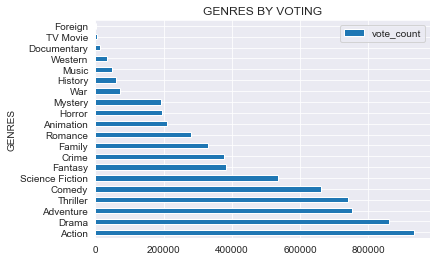

In [225]:
dfgenresbyvotecount = dfcopy2.groupby('genres')['vote_count'].sum().sort_values(ascending=False)
dfgenresbyvotecount.plot(kind='barh', title='GENRES BY VOTING', xlabel='GENRES', legend='vote_count', ylabel='VOTE COUNTS');

**Observation**: from our chart above, we can observe that the most popular genre by votes is Action. with Foreign films having the least vote counts, indicating it's lack of popularity amongst viewers.

I will be observing relationships among variables in the dataset to view how features in our dataset interact with one another. the purpose is to uncover patterns in our data and generate valuable insights for a more refined analysis.

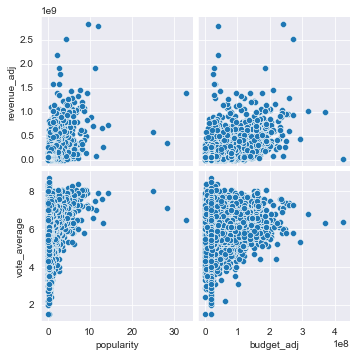

In [136]:
variables1 = ['popularity', 'budget_adj']
variables2 = ['revenue_adj', 'vote_average']
sns.pairplot(data=dfcopy2, x_vars=variables1, y_vars=variables2);

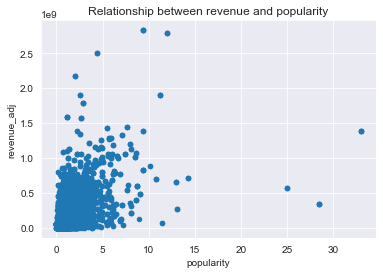

In [174]:
# I will be defining a function to observe relationships between two variables at a time.

def plot_scatter(dfcopy2, variable1, variable2):
    return dfcopy2.plot(kind='scatter', x=variable1, y=variable2, title='Relationship between revenue and popularity')

variable1='popularity'
variable2='revenue_adj'

plot_scatter(dfcopy2, variable1, variable2);

**OBSERVATION**: From the above scatter plots, we can observe the relationship between vriables, **Between budget and runtime**: we can see that more goes into movies with a runtime less than 200mins. This will infer that production companies are not willing to make movies that are longer that 200minutes. **Between revenue and runtime**: we can observe that movies with runtime within 200 minutes earn much of the revenues in our dataset. **Between vote average and runtime**: we can observe that much of the movies with Higher ratings are movies with a runtime within 200 minutes. 

Next, I will be plotting the distribution for Genres. This will give us an idea of what movie genre appears more often in our dataset.

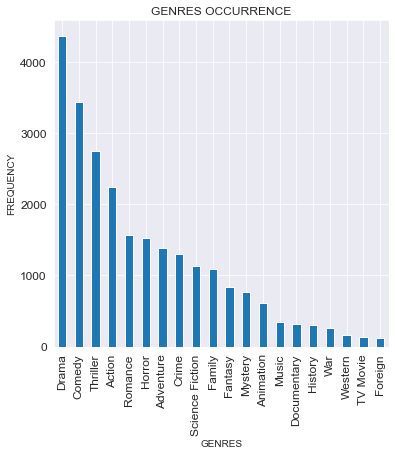

In [226]:
dfcopy2.genres.value_counts().plot(kind='bar', figsize=(6,6), title='GENRES OCCURRENCE', xlabel='GENRES', ylabel='FREQUENCY', fontsize=12);

From the chart plotted below, it appears that the more genre in our datasets are westerns, mystery and dramas, with Foreign films having the least occurence in our dataset. Drama genre has the highest appearance in our dataset with over 4000 entries.


Next, I will be observing the populrity of genres. this will give us a definitive claim to which genre is the most popular in our dataset. 

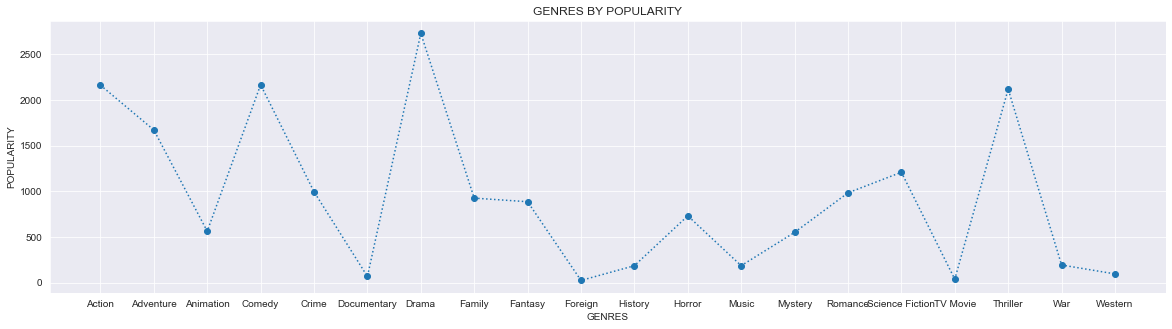

In [227]:
genreBYpopularity = dfcopy2.groupby('genres').popularity.sum()
labels = 'Genre'
plt.figure(figsize=(20, 5))
plt.plot(genreBYpopularity, linestyle=':', marker='o', label=labels)
plt.ylabel('POPULARITY')
plt.xlabel('GENRES')
plt.title('GENRES BY POPULARITY');

From our chart, it appears that the most popular genre is Drama. From this analysis, it would be advisable for production companies to look into this genre of film making.

Next, I will be looking into the average profits made by low budget and high budget movies, to do this, i will be
computing the median value of the budget column then i will categorise budgets into two categories. The budget values lower
than the median will be placed in the low budget categories and the budget values higher than the median will be placed in 
high budget category.

In [168]:
budgetmedian = dfcopy2.budget_adj.median()

lowBudget = dfcopy2.query('budget_adj < budget_adj.median()')
highBudget = dfcopy2.query('budget_adj >= budget_adj.median()')

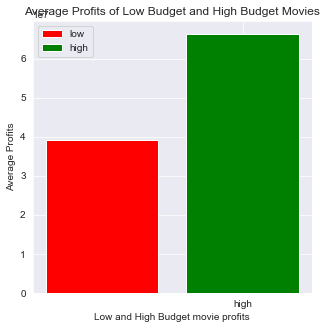

In [172]:
lowbudget_meanprofits = lowBudget['profit'].mean()
highbudget_meanprofits = highBudget['profit'].mean()

colors=['red', 'green']
labels = ['low', 'high']
plt.figure(figsize=(5, 5))
plt.bar(height = lowbudget_meanprofits, x=1, tick_label='rtt', color='r')
plt.bar(height = highbudget_meanprofits, x=2, tick_label='high', color='g')
plt.title('Average Profits of Low Budget and High Budget Movies')
plt.xlabel('Low and High Budget movie profits')
plt.ylabel('Average Profits')
plt.legend(labels);

From the charts above, we get a clear picture of the differences in profits between High budget movies 
and low Budget movies. Production companies can utilise this information in deciding what types of movies they might want to produce and How much they should be willing to spend. The average profits of highbudget movies exceed the average profits of low budget movies by 50%.

Now, I will be plotting a graph to show the earnings of different genres in the dataset.

In [86]:
revenueBygenre = dfcopy2.groupby('genres')['revenue_adj'].sum()/1000000

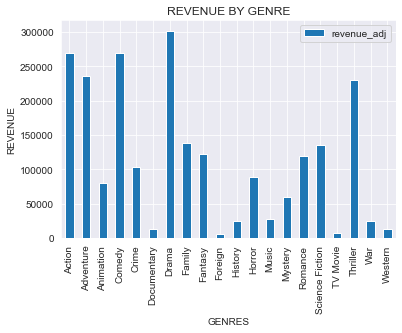

In [221]:
revenueBygenre.plot(kind='bar', ylabel='REVENUE', xlabel='GENRES', title='REVENUE BY GENRE', legend='revenue_adj');

From the chart above, the Highest earning genres, are Drama, Comedy, Action and Thriller, with Foreign films being the lowest earning genre.

In [88]:
# Once again i create a copy of my dataset to serve as a backup.
dfcopy3 = dfcopy2.copy()
dfcopy3.head()

,id,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,Jurassic World,Colin Trevorrow,124.0,Action,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,135397,32.985763,Jurassic World,Colin Trevorrow,124.0,Adventure,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,135397,32.985763,Jurassic World,Colin Trevorrow,124.0,Science Fiction,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,135397,32.985763,Jurassic World,Colin Trevorrow,124.0,Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,76341,28.419936,Mad Max: Fury Road,George Miller,120.0,Action,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08


In [89]:
# I intend to make the release date column a datetime column, to be able to access timeseries functionality. Firstly, 
# I set the index as the release date, whilst the maintaining the columns position in the dataset.
dfcopy3.set_index('release_date', inplace=True, drop=False)
dfcopy3.head(3)

,id,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
release_date,,,,,,,,,,,,,
6/9/15,135397,32.985763,Jurassic World,Colin Trevorrow,124.0,Action,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
6/9/15,135397,32.985763,Jurassic World,Colin Trevorrow,124.0,Adventure,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
6/9/15,135397,32.985763,Jurassic World,Colin Trevorrow,124.0,Science Fiction,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09


In [90]:
# After making the release date column a datetime column, I noticed some of the dates retuned were wrong, so I extract the month
# from the datetime column as i will be needing it for my analysis. 
dfcopy3['release_date'] = pd.to_datetime(dfcopy3['release_date'])
dfcopy3.tail()

,id,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
release_date,,,,,,,,,,,,,
1/1/66,39768,0.065141,Beregis Avtomobilya,Eldar Ryazanov,94.0,Mystery,2066-01-01,11,6.5,1966,1.754989e+07,5.136900e+07,3.381911e+07
1/1/66,39768,0.065141,Beregis Avtomobilya,Eldar Ryazanov,94.0,Comedy,2066-01-01,11,6.5,1966,1.754989e+07,5.136900e+07,3.381911e+07
11/2/66,21449,0.064317,"What's Up, Tiger Lily?",Woody Allen,80.0,Action,2066-11-02,22,5.4,1966,1.754989e+07,5.136900e+07,3.381911e+07
11/2/66,21449,0.064317,"What's Up, Tiger Lily?",Woody Allen,80.0,Comedy,2066-11-02,22,5.4,1966,1.754989e+07,5.136900e+07,3.381911e+07
11/15/66,22293,0.035919,Manos: The Hands of Fate,Harold P. Warren,74.0,Horror,2066-11-15,15,1.5,1966,1.276423e+05,5.136900e+07,5.124136e+07


In [91]:
dfcopy3['month'] = dfcopy3.release_date.dt.month
dfcopy3.tail()

,id,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,month
release_date,,,,,,,,,,,,,,
1/1/66,39768,0.065141,Beregis Avtomobilya,Eldar Ryazanov,94.0,Mystery,2066-01-01,11,6.5,1966,1.754989e+07,5.136900e+07,3.381911e+07,1
1/1/66,39768,0.065141,Beregis Avtomobilya,Eldar Ryazanov,94.0,Comedy,2066-01-01,11,6.5,1966,1.754989e+07,5.136900e+07,3.381911e+07,1
11/2/66,21449,0.064317,"What's Up, Tiger Lily?",Woody Allen,80.0,Action,2066-11-02,22,5.4,1966,1.754989e+07,5.136900e+07,3.381911e+07,11
11/2/66,21449,0.064317,"What's Up, Tiger Lily?",Woody Allen,80.0,Comedy,2066-11-02,22,5.4,1966,1.754989e+07,5.136900e+07,3.381911e+07,11
11/15/66,22293,0.035919,Manos: The Hands of Fate,Harold P. Warren,74.0,Horror,2066-11-15,15,1.5,1966,1.276423e+05,5.136900e+07,5.124136e+07,11


In [92]:
# After extracting the month from the datetime column, I will be dropping the column.
dfcopy3.drop('release_date', axis=1, inplace=True)

In [93]:
dfcopy3.tail()

,id,popularity,original_title,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,month
release_date,,,,,,,,,,,,,
1/1/66,39768,0.065141,Beregis Avtomobilya,Eldar Ryazanov,94.0,Mystery,11,6.5,1966,1.754989e+07,5.136900e+07,3.381911e+07,1
1/1/66,39768,0.065141,Beregis Avtomobilya,Eldar Ryazanov,94.0,Comedy,11,6.5,1966,1.754989e+07,5.136900e+07,3.381911e+07,1
11/2/66,21449,0.064317,"What's Up, Tiger Lily?",Woody Allen,80.0,Action,22,5.4,1966,1.754989e+07,5.136900e+07,3.381911e+07,11
11/2/66,21449,0.064317,"What's Up, Tiger Lily?",Woody Allen,80.0,Comedy,22,5.4,1966,1.754989e+07,5.136900e+07,3.381911e+07,11
11/15/66,22293,0.035919,Manos: The Hands of Fate,Harold P. Warren,74.0,Horror,15,1.5,1966,1.276423e+05,5.136900e+07,5.124136e+07,11


Now let's look at the distributions of numerical data in our dataset. 

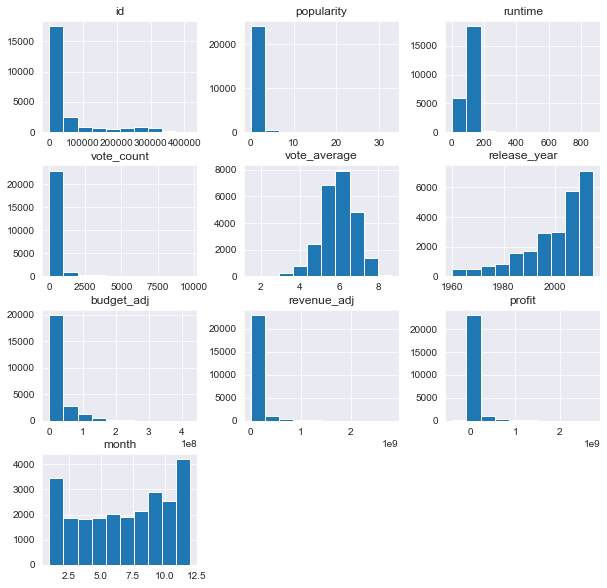

In [94]:
dfcopy3.hist(figsize=(10, 10));

**Observation**: From the charts above, we can observe the frequency of values in the numerical variables of the dataset. we can observe that majority of runtime column values are below 200 minutes, and vote average values are largely concentrated between 4 and 8. Lastly, looking at the month column which shows us the month of release, we can observe that more values appear at the begining of the year and at the end, indicating that more movies are released at the start of the year and towards the end.

### Research Question 2  (What is the most profitable period to make movies)

My step of Analysis, will be to plot a graph showing the monthly profits in the movie dataset, the goal is to discover 
which particualr months of the year are most lucrative for movie release. This information will be very vital for production 
companies in scheduling release dates.

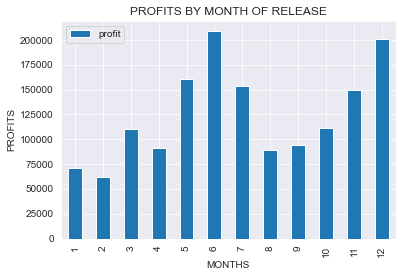

In [220]:
revenueBYmonth = dfcopy3.groupby('month')['profit'].sum()/1000000
revenueBYmonth.plot(kind='bar', xlabel='MONTHS', ylabel='PROFITS', title='PROFITS BY MONTH OF RELEASE', legend='profit');

From the chart above, we can see that the most profitable periods to release movies is in the middle of the year 
and at the end of the year. Armed with this information, Production companies can be quite certain that releasing their
movies during these periods will be financially intuitive. 


# Research Question 3: (How has movie budget and revenues grown over the years)

This Chart shows us how the Budget for movie production has increased over time, this will come in handy for production companies during budget preparation.

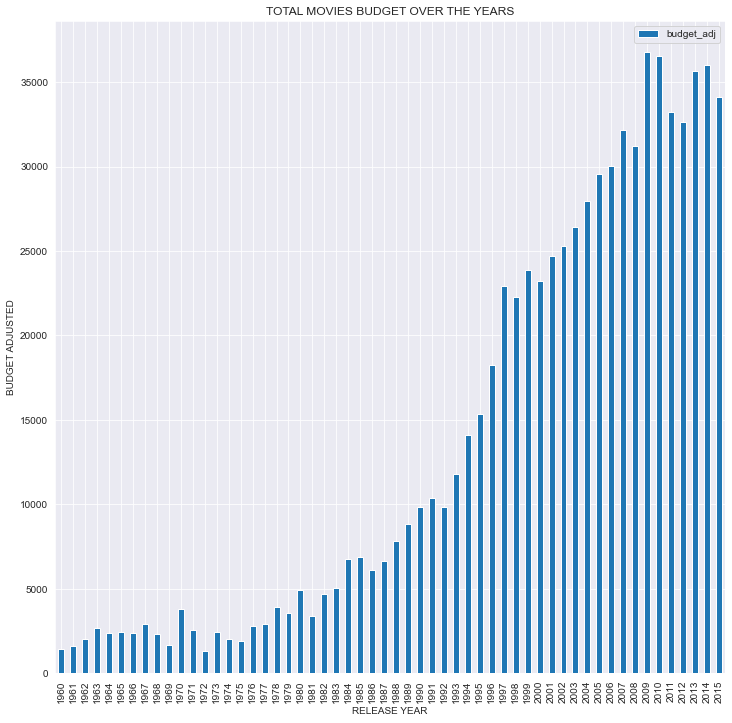

In [214]:
moviebudgetyearly = dfcopy3.groupby('release_year')['budget_adj'].sum()/1000000
moviebudgetyearly.plot(kind='bar', figsize=(12, 12), title='TOTAL MOVIES BUDGET OVER THE YEARS', ylabel='BUDGET ADJUSTED', xlabel='RELEASE YEAR', legend='budget_adj');

The Chart above shows us how movies profits have risen overtime. It would appear that as budgets rise, profits also rise as shown below


Now let's look at how profits have changed over the years.

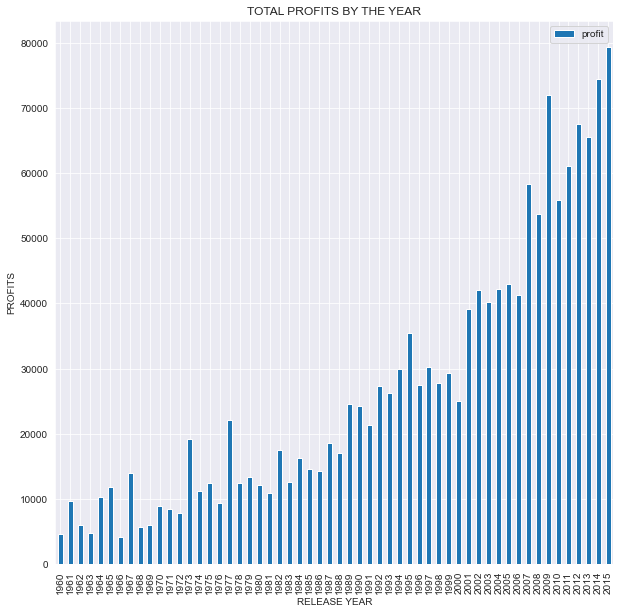

In [215]:
movieprofitsyearly = dfcopy3.groupby('release_year')['profit'].sum()/1000000
movieprofitsyearly.plot(kind='bar', figsize=(10,10), title='TOTAL PROFITS BY THE YEAR', ylabel='PROFITS', xlabel='RELEASE YEAR', legend='profit');

From the chart above we can observe significant changes in profits over the years. despite some falls, profits have generally continued to rise over the years.

# Research Question 4: (Which genres has earned the most revenue)

At this stage, I intend to display the proportions each genre has claimed from total revenues over the years. The intent is to display a percentage amount that each genre has earned.

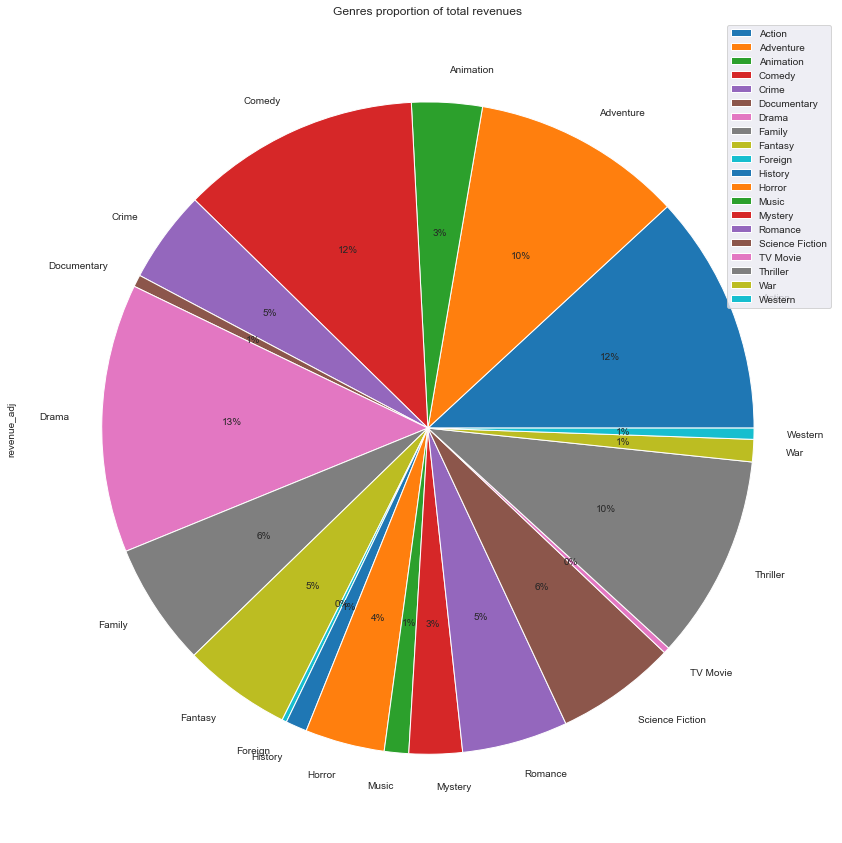

In [219]:
totalrevenuebygenres = dfcopy3.groupby('genres')['revenue_adj'].sum()/1000000
totalrevenuebygenres.plot(kind='pie', figsize=(15, 15), autopct='%1.0f%%', title='Genres proportion of total revenues', legend='genres');


Judging by the charts plotted above, five genres in particular have earned the larger portion of the total revenue from 1960 till 2015. these genres include Drama, Comedy, Adventure, Action and Thriller. These genres are also amongst the most popular genres in our dataset. Drama being the most popular genre leads with 13% of movies revenues over the years, followed closely by Comedy and action with 12% each, with action and thriller genres in third position both having 10% of the total movie revenues from 1960 till 2015.

<a id='conclusions'></a>
## Conclusions:

> While exploring the dataset using scatter plots, I was able to observe relationships between dependent variables(revenue) and independent variables. From the scatter plots, I could see that the majority of production budgets are spent on movies with a runtime below 200 minutes, this will suggest that production movies are more willing to finance the production of movies with a non-lenghty runtime as movies with a runtime around 200 minutes earned majority of the revenues in the dataset. It also appears that movies with a runtime around 200 minutes earned a larger portion of the best vote averages, indicating that viwers are more likely to positively review movies that aren't too long.

>> Furthermore, from the histograms, we can observe that runtime values have remained within the limits of 200 minutes, the budget, revenues and profits column appear to be of similar distribution, also from the month column histogram, we can obseerve that more movies are released at the beginning of the year and at the end of the year. Further analysis shows us how popular each genre is, with drama being the most popular and foreign films being the least popular. I also observed the differences in the average profits between "low budget movies" and "high budget movies". It appears that the profits of high budget movies more than double that of low budget movies. I went further to plot  chart showing the total revenues earned by each genre, with Drama being the highest earner and foreign films being the least eaner, possibly owing to it being the least popular genre.

>> The next phase of my analysis was to find the best periods to release movies, judging from my analysis, the best time of the year to release movies are in the months of June and December. I then went ahead to plot a pie chart showing what genres have earned the most revenues over the years.

# Limitations: 
>> I believe my limitations at this stage of the project will be the current grasp on the subject, with an improved understanding of the subject, a more refined analysis can be conducted. I also observed that the pandas datetime function often parsed the wrong dates. I wasn't sure how to handle this, so i extracted the dates i needed.!

# References:
>> https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column https://stackoverflow.com/questions/53218931/how-to-unnest-explode-a-column-in-a-pandas-dataframe-into-multiple-rows/53219045#53219045
https://stackoverflow.com/questions/71362080/how-to-apply-lambda-function-on-multiple-columns-using-pandas!